In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
pd.set_option('display.max_columns', None)

In [ ]:
accepted2007 = pd.read_csv("accepted_2007_2011.csv")

In [55]:
accepted2016 = pd.read_csv("accepted_2016_2018_individual.csv")

In [56]:
accepted2007.set_index("id", inplace=True)

In [ ]:
accepted2016.set_index("id", inplace=True)

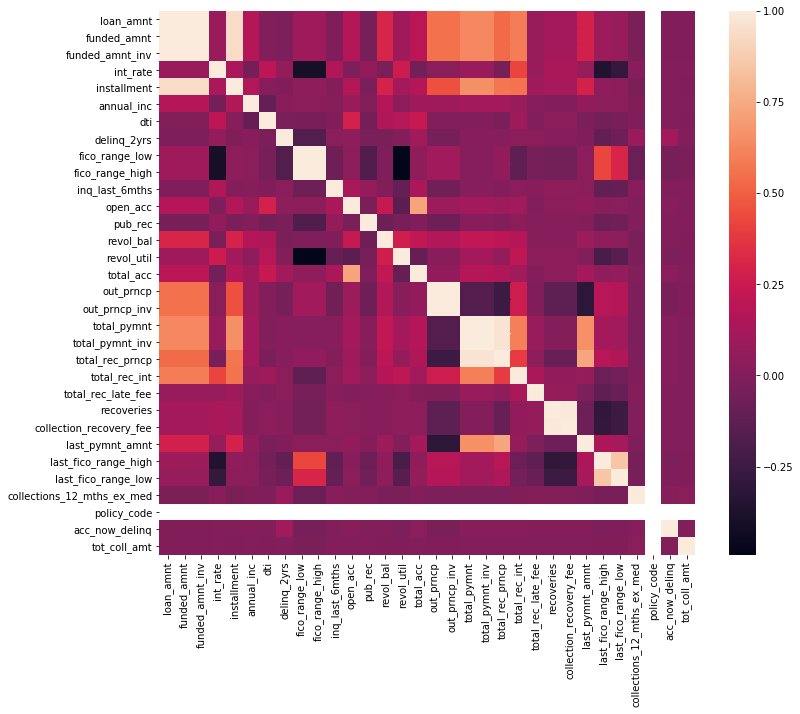

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(accepted.iloc[:, :50].corr())

In [57]:
from sklearn.model_selection import train_test_split

loans = accepted.drop('grade',axis=1)
grade = accepted['grade']
sub_grade = accepted["sub_grade"]
loans_train, loans_test, grade_train, grade_test = train_test_split(loans, grade, test_size=0.2, random_state=42)

In [58]:
loans_desc = loans_train.merge(grade_train, left_index=True, right_index=True)

In [59]:
loans_desc.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,grade
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
126200518,6500.0,6500.0,6475.0,36 months,7.35,201.75,A4,Solar Consultant,1 year,MORTGAGE,78000.0,Not Verified,2017-12-01,Current,n,other,credit_card,Credit card refinancing,NJ,7.85,0.0,2012-11-01,680.0,684.0,0.0,10.0,0.0,6828.0,29.7,10.0,f,3963.98,3948.73,3019.610000,3008.00,2536.02,483.59,0.0,0.0,0.0,201.75,2019-03-01,659.0,655.0,0.0,1.0,Individual,0.0,418.0,13176.0,1.0,2.0,1.0,1.0,11.0,6348.0,63.0,2.0,5.0,3575.0,40.0,23000.0,1.0,1.0,3.0,6.0,1318.0,15472.0,30.6,0.0,0.0,29.0,61.0,3.0,3.0,0.0,3.0,11.0,0.0,7.0,7.0,7.0,7.0,2.0,8.0,8.0,7.0,10.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,33134.0,13176.0,22300.0,10134.0,N,DirectPay,N,A
138779959,16000.0,16000.0,16000.0,60 months,22.35,445.10,D5,Teacher,10+ years,MORTGAGE,75000.0,Verified,2018-08-01,Current,n,other,debt_consolidation,Debt consolidation,NY,24.53,2.0,1997-06-01,660.0,664.0,0.0,12.0,0.0,10604.0,54.4,40.0,w,14910.95,14910.95,3075.970000,3075.97,1089.05,1986.92,0.0,0.0,0.0,445.10,2019-03-01,669.0,665.0,0.0,1.0,Individual,0.0,0.0,52491.0,2.0,4.0,1.0,3.0,11.0,41887.0,56.0,5.0,6.0,8353.0,56.0,19500.0,2.0,4.0,5.0,10.0,4374.0,5361.0,65.4,1.0,0.0,128.0,254.0,0.0,0.0,4.0,9.0,3.0,11.0,3.0,5.0,3.0,8.0,11.0,8.0,25.0,5.0,12.0,0.0,0.0,6.0,60.0,33.3,0.0,0.0,84395.0,52491.0,15500.0,64895.0,N,Cash,N,D
123040056,30000.0,30000.0,30000.0,36 months,17.09,1070.93,D1,"Director, Product Management",< 1 year,RENT,200000.0,Verified,2017-11-01,Current,n,other,debt_consolidation,Debt consolidation,VA,25.79,0.0,1998-11-01,705.0,709.0,0.0,12.0,0.0,46836.0,82.6,30.0,w,18524.45,18524.45,17160.910000,17160.91,11475.55,5685.36,0.0,0.0,0.0,1070.93,2019-03-01,684.0,680.0,0.0,1.0,Individual,0.0,0.0,110489.0,1.0,5.0,2.0,3.0,5.0,63653.0,52.0,0.0,2.0,20420.0,62.0,56700.0,0.0,1.0,3.0,5.0,9207.0,3832.0,92.2,0.0,0.0,144.0,228.0,14.0,5.0,0.0,14.0,5.0,0.0,5.0,6.0,5.0,11.0,9.0,7.0,21.0,6.0,12.0,0.0,0.0,2.0,96.7,80.0,0.0,0.0,178649.0,110489.0,49200.0,121949.0,N,Cash,N,D
72695445,6000.0,6000.0,6000.0,36 months,5.32,180.69,A1,bus driver,< 1 year,OWN,33000.0,Source Verified,2016-03-01,Fully Paid,n,other,debt_consolidation,Debt consolidation,IL,3.76,0.0,1994-06-01,725.0,729.0,0.0,10.0,0.0,5559.0,14.3,23.0,w,0.00,0.00,6355.768399,6355.77,6000.00,355.77,0.0,0.0,0.0,633.67,2019-03-01,744.0,740.0,0.0,1.0,Individual,0.0,186.0,95584.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,2.0,3.0,2117.0,14.0,39000.0,0.0,0.0,1.0,3.0,9558.0,25741.0,17.8,0.0,0.0,185.0,261.0,7.0,7.0,1.0,8.0,7.0,0.0,4.0,4.0,7.0,13.0,4.0,9.0,18.0,4.0,10.0

In [ ]:
drop_no_var2007 = ["hardship_flag", "disbursement_method", "tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
"policy_code", "collections_12_mths_ex_med", "out_prncp", "out_prncp_inv", "pub_rec", "desc", "loan_status", "initial_list_status"]

In [60]:
drop_no_var2016 = ["hardship_flag", "chargeoff_within_12_mths", "application_type", "policy_code", "out_prncp",
               "pymnt_plan"]

In [ ]:
post_loan_list2007 = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment"]

In [61]:
post_loan_list2016 = ["loan_status", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
                  "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_credit_pull_d", 
                  "last_fico_range_high", "last_fico_range_low", "debt_settlement_flag", "installment", 
                  "disbursement_method", "hardship_flag"]

In [62]:
drop_list_obj = ["sub_grade", "emp_title", "title", "addr_state", "earliest_cr_line", 
                 "issue_d", "desc"]

In [65]:
loans_train.drop((drop_no_var + post_loan_list + drop_list_obj), axis = 1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
loans_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
126200518,6500.0,6500.0,6475.0,36 months,7.35,1 year,MORTGAGE,78000.0,Not Verified,credit_card,7.85,0.0,680.0,684.0,0.0,10.0,0.0,6828.0,29.7,10.0,f,3948.73,0.0,0.0,418.0,13176.0,1.0,2.0,1.0,1.0,11.0,6348.0,63.0,2.0,5.0,3575.0,40.0,23000.0,1.0,1.0,3.0,6.0,1318.0,15472.0,30.6,0.0,29.0,61.0,3.0,3.0,0.0,3.0,11.0,0.0,7.0,7.0,7.0,7.0,2.0,8.0,8.0,7.0,10.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,33134.0,13176.0,22300.0,10134.0
138779959,16000.0,16000.0,16000.0,60 months,22.35,10+ years,MORTGAGE,75000.0,Verified,debt_consolidation,24.53,2.0,660.0,664.0,0.0,12.0,0.0,10604.0,54.4,40.0,w,14910.95,0.0,0.0,0.0,52491.0,2.0,4.0,1.0,3.0,11.0,41887.0,56.0,5.0,6.0,8353.0,56.0,19500.0,2.0,4.0,5.0,10.0,4374.0,5361.0,65.4,0.0,128.0,254.0,0.0,0.0,4.0,9.0,3.0,11.0,3.0,5.0,3.0,8.0,11.0,8.0,25.0,5.0,12.0,0.0,0.0,6.0,60.0,33.3,0.0,0.0,84395.0,52491.0,15500.0,64895.0
123040056,30000.0,30000.0,30000.0,36 months,17.09,< 1 year,RENT,200000.0,Verified,debt_consolidation,25.79,0.0,705.0,709.0,0.0,12.0,0.0,46836.0,82.6,30.0,w,18524.45,0.0,0.0,0.0,110489.0,1.0,5.0,2.0,3.0,5.0,63653.0,52.0,0.0,2.0,20420.0,62.0,56700.0,0.0,1.0,3.0,5.0,9207.0,3832.0,92.2,0.0,144.0,228.0,14.0,5.0,0.0,14.0,5.0,0.0,5.0,6.0,5.0,11.0,9.0,7.0,21.0,6.0,12.0,0.0,0.0,2.0,96.7,80.0,0.0,0.0,178649.0,110489.0,49200.0,121949.0
72695445,6000.0,6000.0,6000.0,36 months,5.32,< 1 year,OWN,33000.0,Source Verified,debt_consolidation,3.76,0.0,725.0,729.0,0.0,10.0,0.0,5559.0,14.3,23.0,w,0.00,0.0,0.0,186.0,95584.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,2.0,3.0,2117.0,14.0,39000.0,0.0,0.0,1.0,3.0,9558.0,25741.0,17.8,0.0,185.0,261.0,7.0,7.0,1.0,8.0,7.0,0.0,4.0,4.0,7.0,13.0,4.0,9.0,18.0,4.0,10.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,135224.0,5559.0,31300.0,0.0
140239763,20000.0,20000.0,20000.0,60 months,15.02,10+ years,RENT,58000.0,Source Verified,debt_consolidation,17.61,0.0,690.0,694.0,0.0,8.0,0.0,10436.0,39.0,11.0,w,18602.86,0.0,0.0,0.0,20180.0,0.0,2.0,0.0,1.0,13.0,9744.0,70.0,0.0,5.0,3055.0,39.0,27000.0,0.0,1.0,0.0,6.0,2522.0,5000.0,30.0,0.0,55.0,63.0,13.0,13.0,0.0,18.0,13.0,0.0,4.0,6.0,6.0,6.0,2.0,6.0,9.0,5.0,8.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,41001.0,20180.0,20000.0,14001.0


In [68]:
loans_train = pd.get_dummies(loans_train)

## 2007-2011

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv = cross_val_score(DecisionTreeClassifier(),Xtrain, ytrain,cv=10)

In [ ]:
np.mean(cv)

### Decission tree train

In [ ]:
from sklearn.model_selection import train_test_split

loans = accepted.drop('grade',axis=1)
grade = accepted['grade']
sub_grade = accepted["sub_grade"]
loans_train, loans_test, grade_train, grade_test = train_test_split(loans, grade, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
grade_class = DecisionTreeClassifier(random_state=0)

In [ ]:
Xtrain = loans_train
ytrain = grade_train

In [ ]:
grade_class.fit(Xtrain, ytrain)

### Confussion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = grade_class.predict(loans_test_with_dummies)

In [ ]:
confusion_matrix(grade_test,y_pred)

In [ ]:
print(classification_report(grade_test,y_pred))

## 2016-2018

### Decission tree train

In [69]:
from sklearn.tree import DecisionTreeClassifier
grade_class = DecisionTreeClassifier(random_state=0)

In [70]:
Xtrain = loans_train
ytrain = grade_train

In [71]:
grade_class.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cv = cross_val_score(DecisionTreeClassifier(),Xtrain, ytrain,cv=10)

In [84]:
np.mean(cv)

0.9873979424055074

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = grade_class.predict(loans_test_with_dummies)

In [ ]:
confusion_matrix(grade_test,y_pred)

In [ ]:
print(classification_report(grade_test,y_pred))